In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import ssl 

In [3]:
pip install --upgrade certifi

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [2]:
import tensorflow as tf

#Getting Dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
#Normalizing the image i.e Pixel Normalization b/w [0-1] 

x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
#shape of training and testing data

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(set(y_train))}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


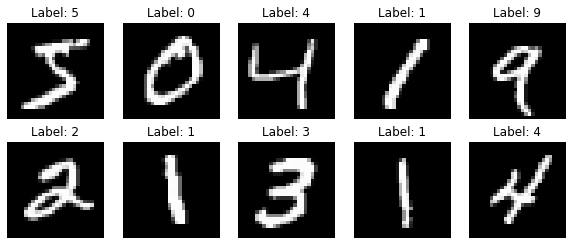

In [5]:
#Visualize a Few Samples

import matplotlib.pyplot as plt

# Plot the first 10 images from the training set
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [6]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


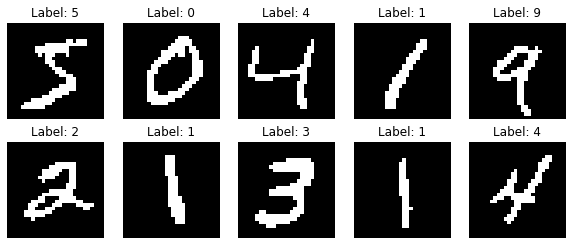

In [7]:

import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    return np.where(image > 0.5, 1, 0)

#Binarinization of images

x_train = preprocess_image(x_train)
x_test = preprocess_image(x_test)

#Reshaping the images in dataset

x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Input shape for MNIST images
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (0-9)
])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy' if using one-hot encoded labels
              metrics=['accuracy'])


Epoch 1/50
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1063 - accuracy: 0.9760 - val_loss: 0.1519 - val_accuracy: 0.9699 - lr: 0.0100
Epoch 2/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0988 - accuracy: 0.9767 - val_loss: 0.1550 - val_accuracy: 0.9706 - lr: 0.0100
Epoch 3/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1009 - accuracy: 0.9768 - val_loss: 0.2043 - val_accuracy: 0.9604 - lr: 0.0100
Epoch 4/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1061 - accuracy: 0.9772 - val_loss: 0.1741 - val_accuracy: 0.9712 - lr: 0.0100
Epoch 5/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0445 - accuracy: 0.9884 - val_loss: 0.1014 - val_accuracy: 0.9840 - lr: 0.0020
Epoch 6/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 0.1258 - val_accuracy: 0.9840 - lr: 0.0020
Epoch 7/50
1875/1875 [========================

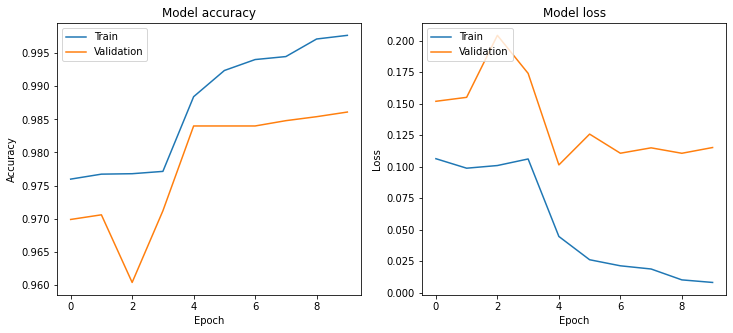

In [11]:
import tensorflow as tf

import matplotlib.pyplot as plt

# Set hyperparameters
EPOCHS = 50
BATCH_SIZE = 32
LEARNING_RATE = 0.01

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoded labels
              metrics=['accuracy'])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

# Train the model
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(test_data)
# print(f'Test accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [12]:
import numpy as np
import tensorflow as tf

# Load the best model
model = tf.keras.models.load_model('best_model.h5')

# Print the shapes for debugging
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)
313/313 [==============================] - 2s 6ms/step - loss: 0.1014 - accuracy: 0.9840
Test Loss: 0.1014
Test Accuracy: 0.9840


313/313 [==============================] - 2s 6ms/step


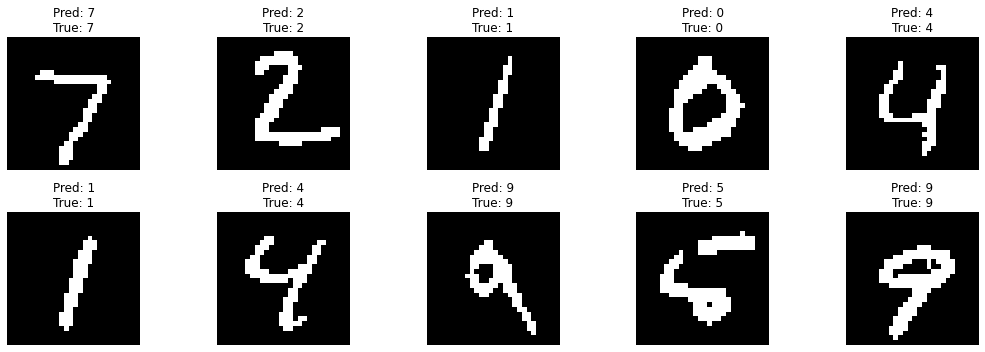

In [13]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(x_test)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Visualize some predictions
num_images = 10  # Number of images to display
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predicted_classes[i]}\nTrue: {y_test[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


<Figure size 720x504 with 0 Axes>

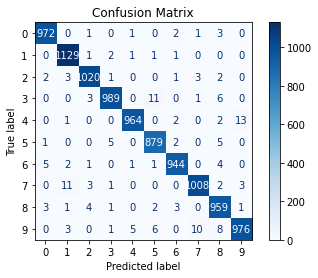

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()